# Assignment 5 Multiple Linear Regression - Toyota Corolla Price Prediction Model

## Problem Statement - Consider only the below columns and prepare a prediction model for predicting Price.

# Price | Age_08_04 | KM | HP | cc | Doors | Gears | Quarterly_Tax | Weight

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
df = pd.read_csv('ToyotaCorolla.csv', encoding = 'latin1')
df

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [3]:
df.shape

(1436, 38)

#### We have to consider only (Price | Age_08_04 | KM | HP | cc | Doors | Gears | Quarterly_Tax | Weight) these attributes

In [4]:
df = df[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
df

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


## Descriptive Analysis and EDA

In [5]:
df.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [7]:
df.isnull().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

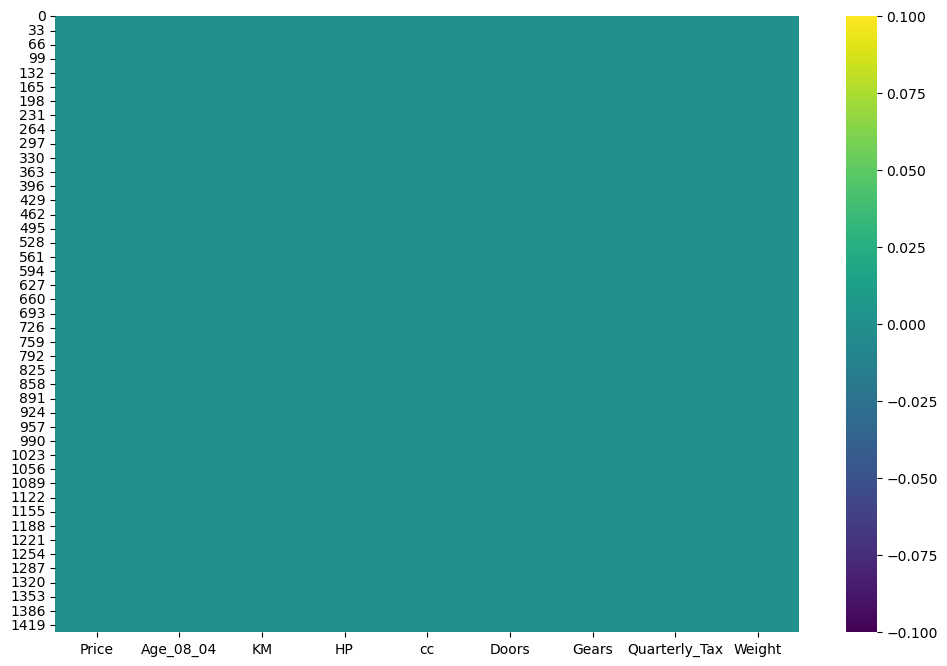

In [8]:
# To confirm availablity of missing values in data set

plt.figure(figsize= (12,8))
sns.heatmap(df.isnull(), cmap= 'viridis')
plt.show()

#### Observations :  there is no null value available in the data set

### Renaming the columns name and making it short


In [9]:
df1 = df.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)
df1.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


### Checking for duplicate values

In [10]:
df1[df1.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [11]:
df1 = df1.drop_duplicates().reset_index(drop=True)
df1[df1.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight


#### Observation: there was duplicate values in the data set. So, drop those values.

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

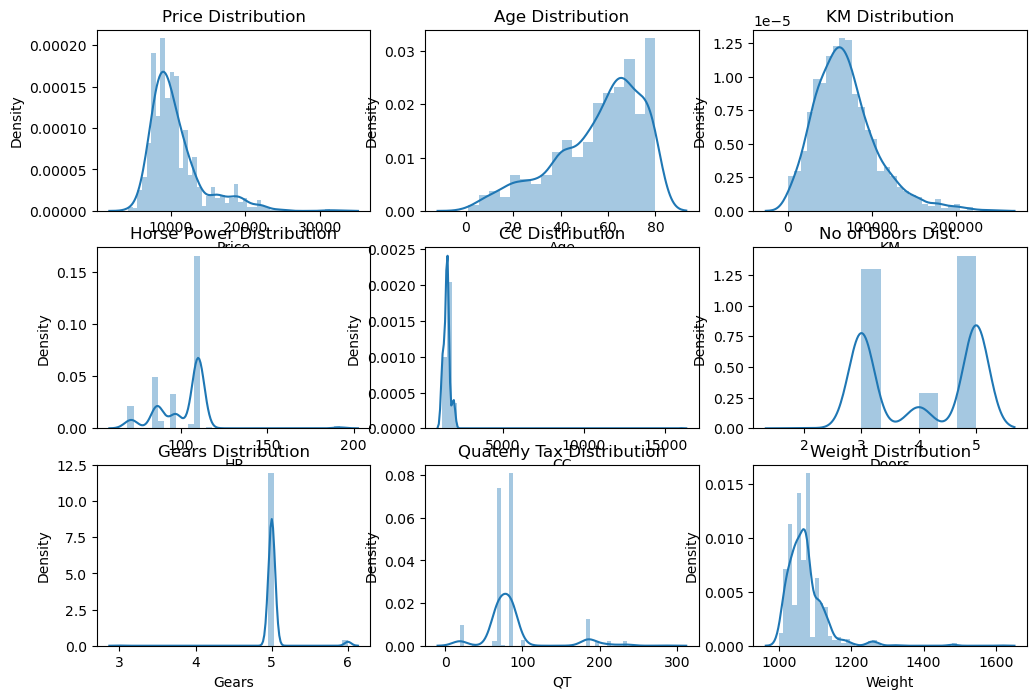

In [12]:
# Distribution Plots to check distribution type

plt.figure(figsize=(12,8))
plt.subplot(331)
sns.distplot(df1.Price)
plt.title('Price Distribution')

plt.subplot(332)
sns.distplot(df1.Age)
plt.title('Age Distribution')

plt.subplot(333)
sns.distplot(df1.KM)
plt.title('KM Distribution')

plt.subplot(334)
sns.distplot(df1.HP)
plt.title('Horse Power Distribution')

plt.subplot(335)
sns.distplot(df1.CC)
plt.title('CC Distribution')

plt.subplot(336)
sns.distplot(df1.Doors)
plt.title('No of Doors Dist.')

plt.subplot(337)
sns.distplot(df1.Gears)
plt.title('Gears Distribution')

plt.subplot(338)
sns.distplot(df1.QT)
plt.title('Quaterly Tax Distribution')

plt.subplot(339)
sns.distplot(df1.Weight)
plt.title('Weight Distribution')

plt.show()

#### We can say that Price, KM, Age and Weight are continuous variable in data set and remaining are discrete one.

## Visualizing the Distribution of Continuous Features with the help of Histograms and Probability Plot

In [13]:
import pylab
import scipy.stats as stat
def plot_data(df1,feature):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    df1[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df1[feature], dist='norm', plot=pylab)

Text(0.5, 1.0, 'Weight')

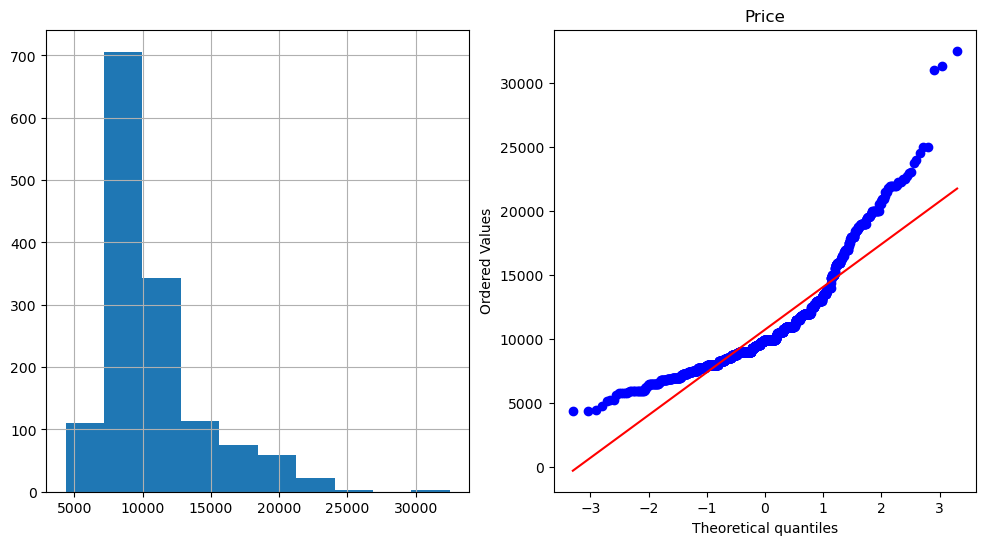

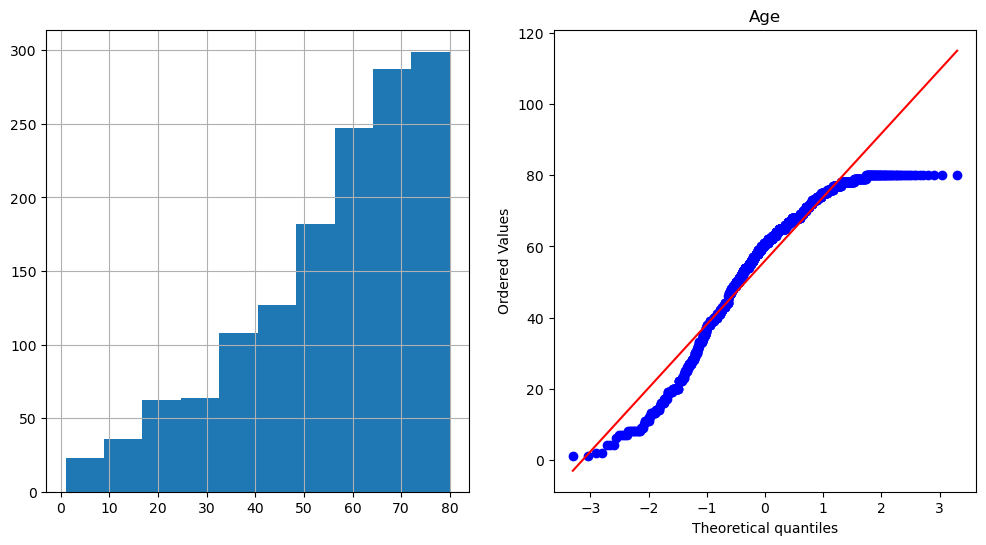

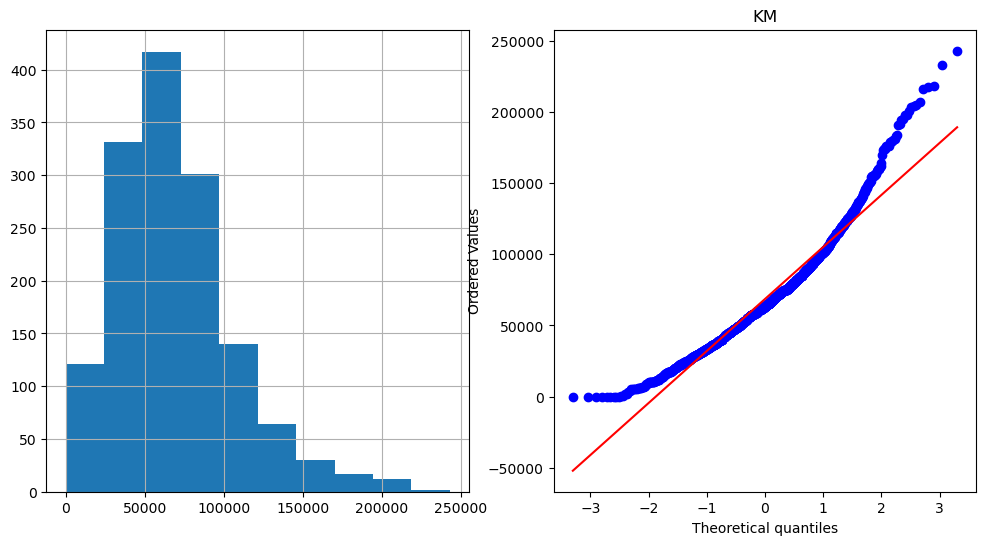

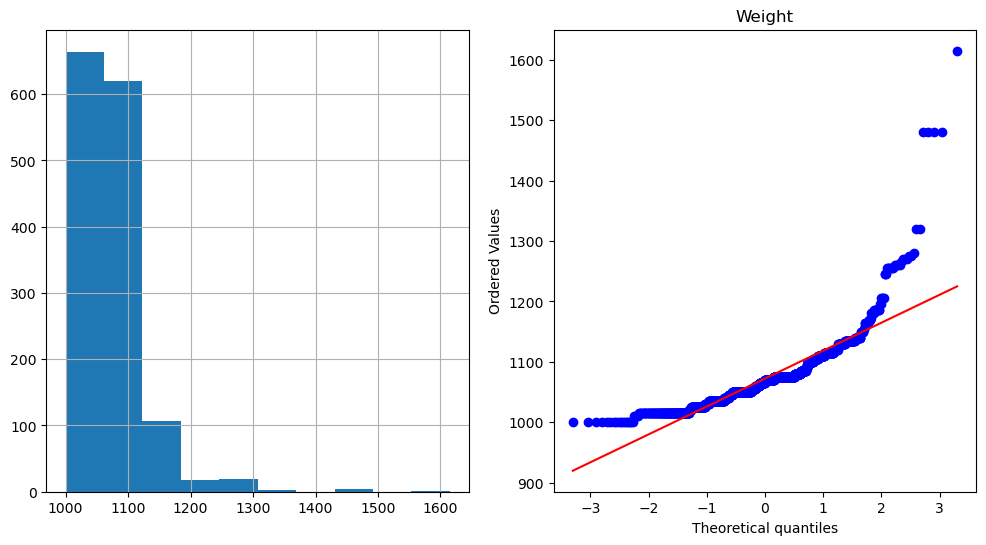

In [14]:
plot_data(df1,'Price')
plt.title('Price')
plot_data(df1,'Age')
plt.title('Age')
plot_data(df1,'KM')
plt.title('KM')
plot_data(df1,'Weight')
plt.title('Weight')

In [15]:
## Correlation Matrix

df1.corr()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


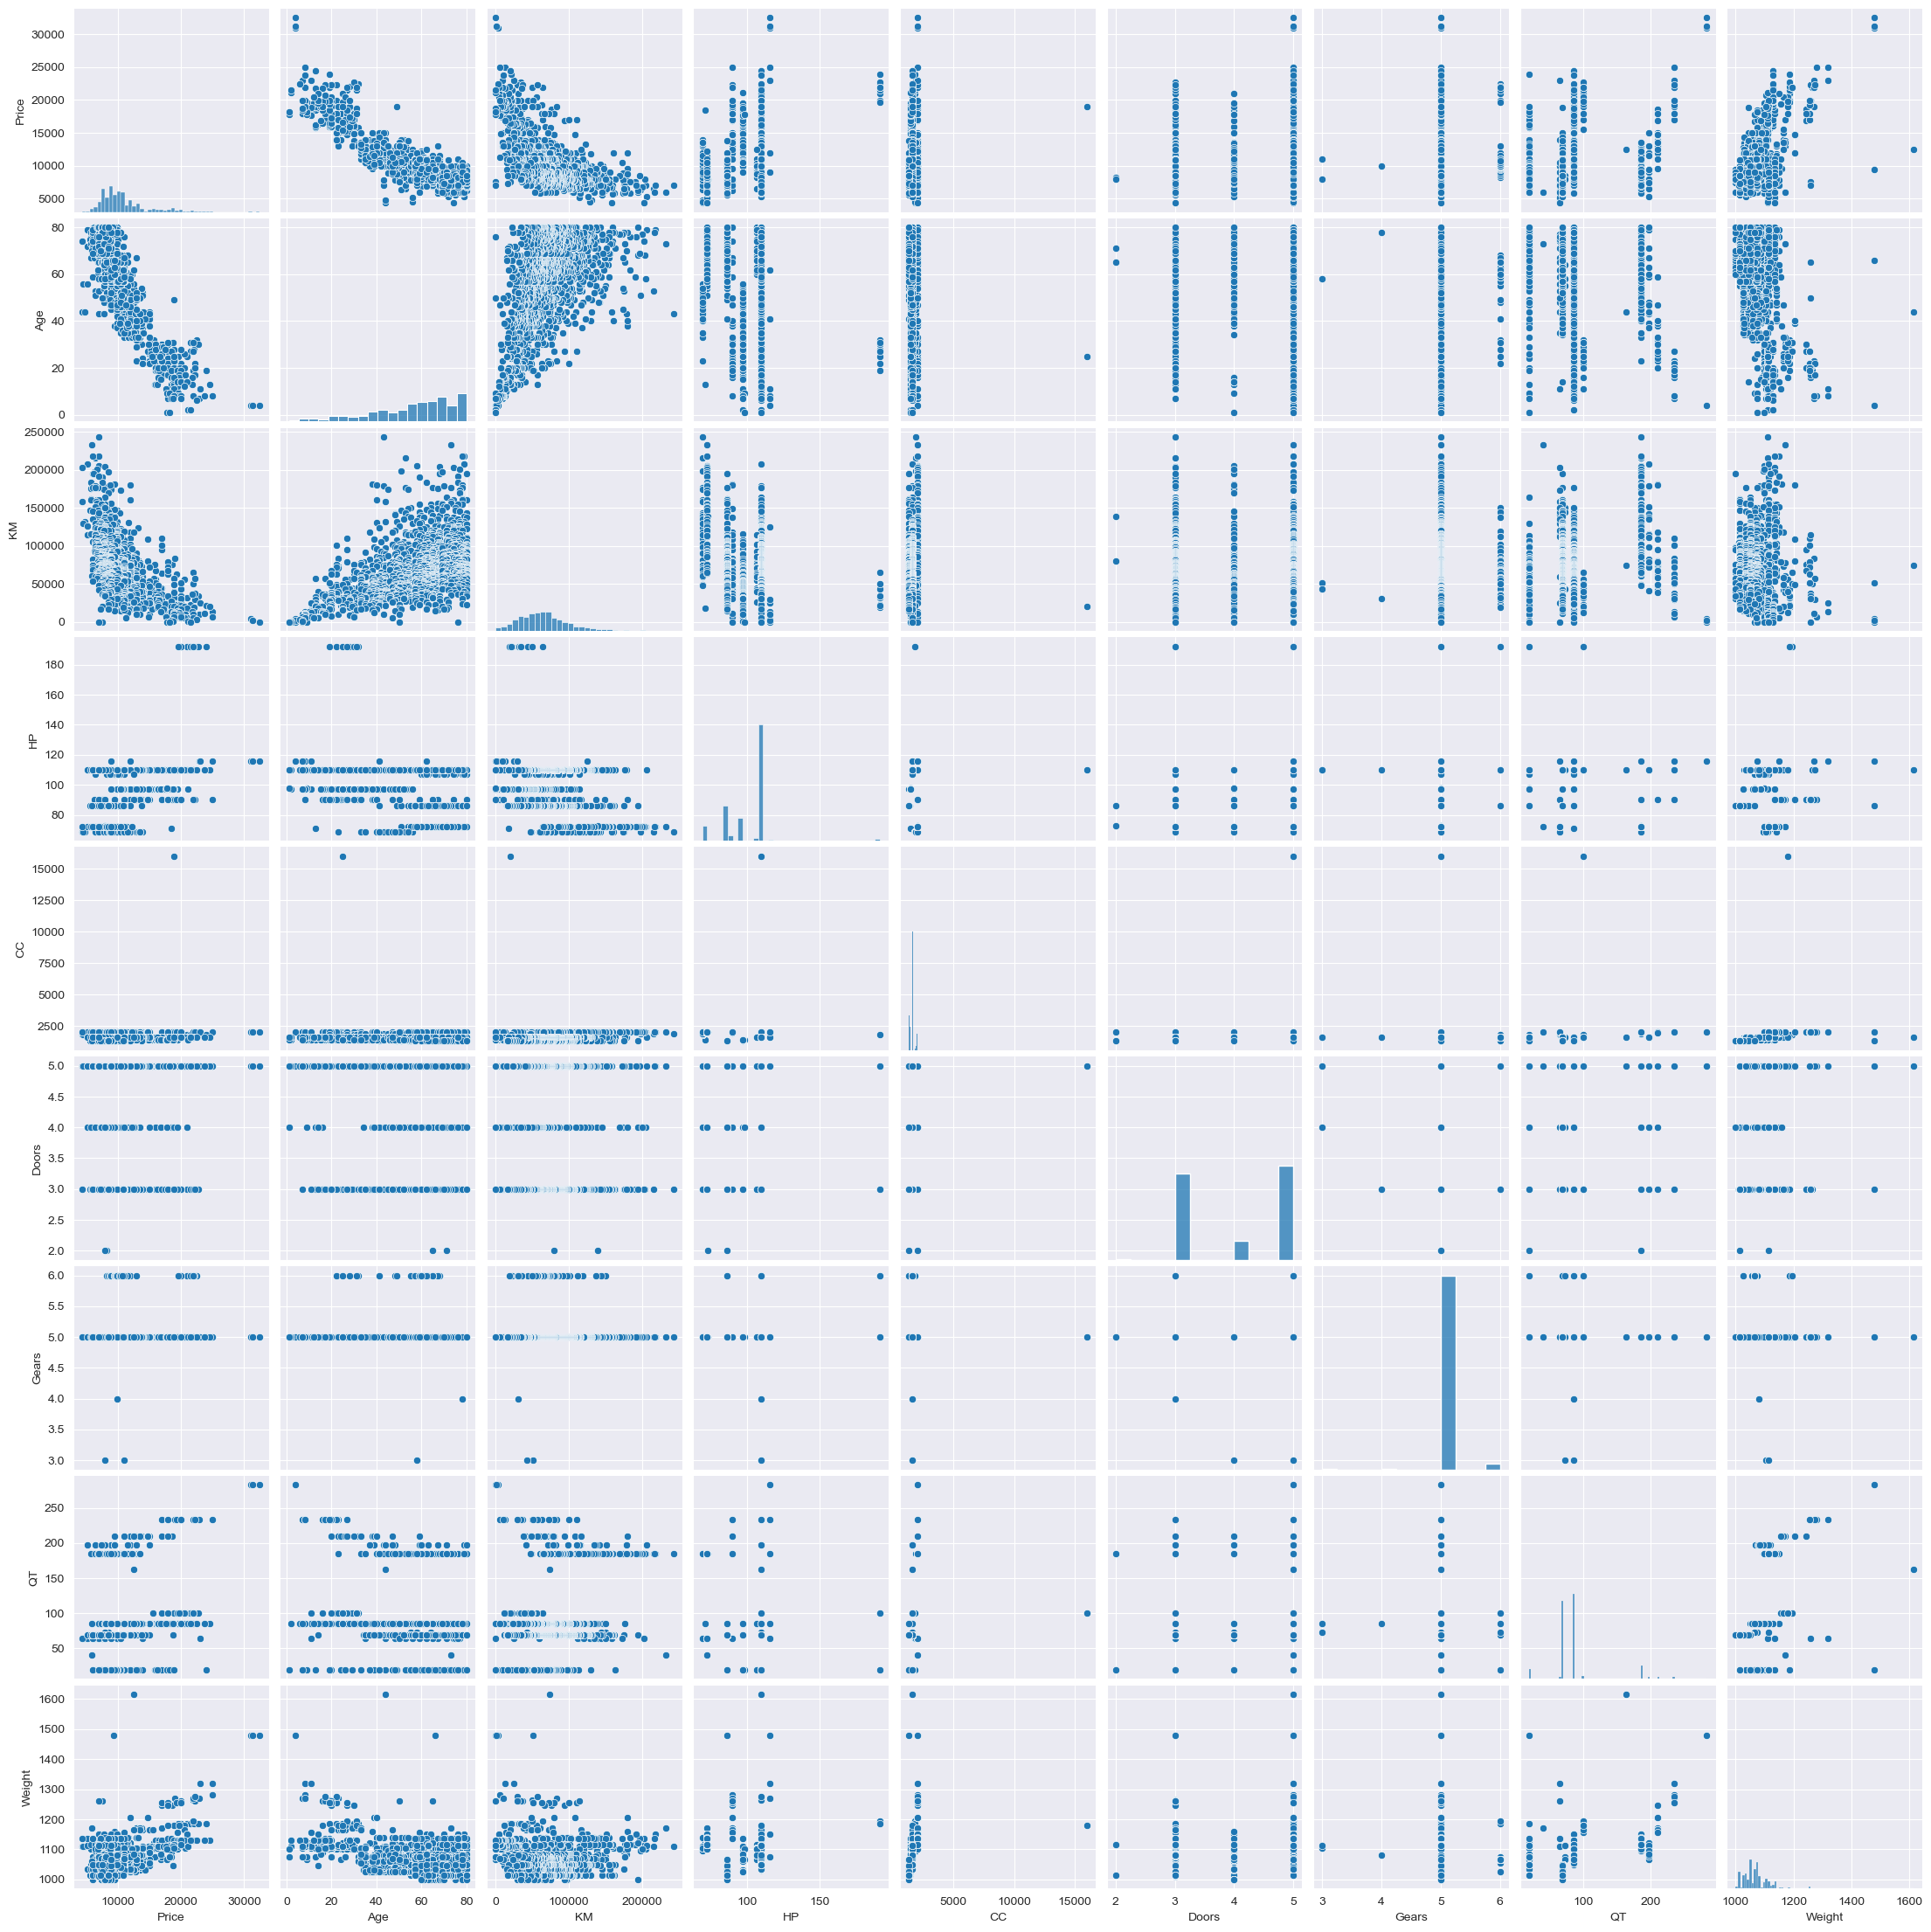

In [16]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(df1)

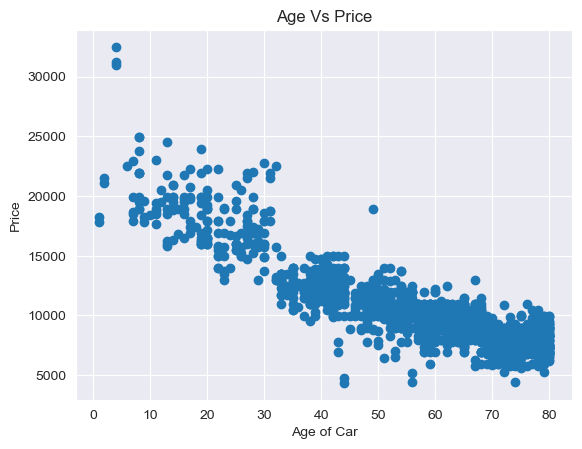

In [17]:
# Relation of Age with Price
plt.scatter(df1['Age'], df1['Price'])
plt.xlabel('Age of Car')
plt.ylabel('Price')
plt.title('Age Vs Price')
plt.show()

#### There is strong negative linear relarion between Age and Price

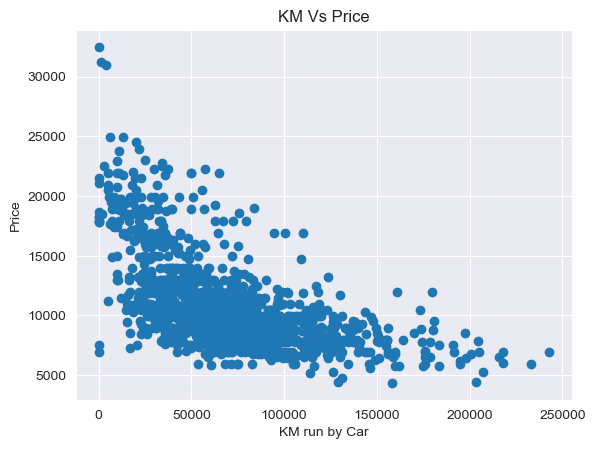

In [18]:
# Relation of KM with Price
plt.scatter(df1['KM'], df1['Price'])
plt.xlabel('KM run by Car')
plt.ylabel('Price')
plt.title('KM Vs Price')
plt.show()

#### There is moderate negative linear relation between KM and Price

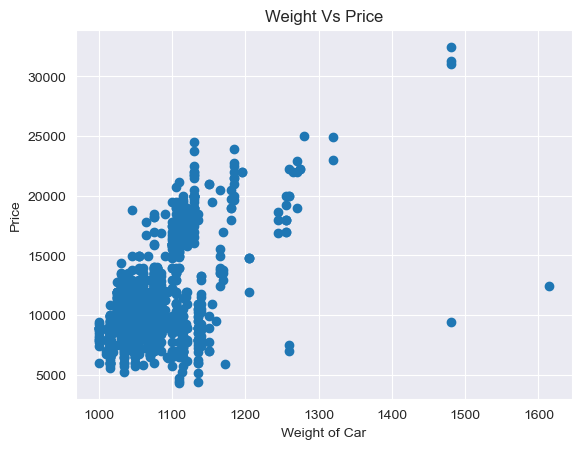

In [19]:
# Relation of Weight with Price
plt.scatter(df1['Weight'], df1['Price'])
plt.xlabel('Weight of Car')
plt.ylabel('Price')
plt.title('Weight Vs Price')
plt.show()

#### There is moderate positive linear relation between Weight and Price

## Outlier Detection by ploting Box Plot

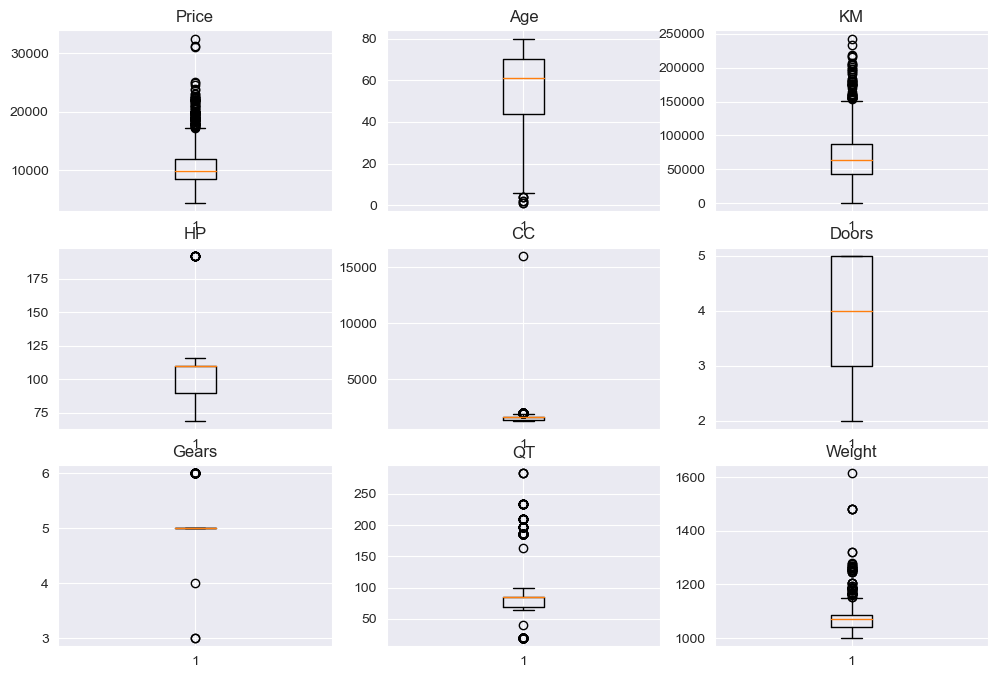

In [20]:
plt.figure(figsize=(12,8))
plt.subplot(331)
plt.boxplot(df1.Price)
plt.title('Price')

plt.subplot(332)
plt.boxplot(df1.Age)
plt.title('Age')

plt.subplot(333)
plt.boxplot(df1.KM)
plt.title('KM')

plt.subplot(334)
plt.boxplot(df1.HP)
plt.title('HP')

plt.subplot(335)
plt.boxplot(df1.CC)
plt.title('CC')

plt.subplot(336)
plt.boxplot(df1.Doors)
plt.title('Doors')

plt.subplot(337)
plt.boxplot(df1.Gears)
plt.title('Gears')

plt.subplot(338)
plt.boxplot(df1.QT)
plt.title('QT')

plt.subplot(339)
plt.boxplot(df1.Weight)
plt.title('Weight')

plt.show()

### We can see that, there are outliers in Price, KM, Age, Weight and QT Columns

In [21]:
df1.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


## Model Building

In [22]:
model1 = smf.ols('Price ~ Age + KM + HP + CC + Doors + Gears + QT + Weight', data = df1).fit()

In [23]:
# Finding Regression Co-efficient of Parameter
model1.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
CC             -0.118558
Doors          -0.920189
Gears         597.715894
QT              3.858805
Weight         16.855470
dtype: float64

In [24]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        17:40:34   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
CC            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
QT             3.8588      1.311      2.944      0.003       1.288       6.430
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
# R-squared and R-squared_adj values

(model1.rsquared , model1.rsquared_adj)

(0.8625200256947, 0.8617487495415146)

In [26]:
# Finding t-values and p-values
model1.tvalues , np.round(model1.pvalues,5)

(Intercept    -3.875273
 Age         -46.551876
 KM          -16.552424
 HP           11.209719
 CC           -1.316436
 Doors        -0.023012
 Gears         3.034563
 QT            2.944198
 Weight       15.760663
 dtype: float64,
 Intercept    0.00011
 Age          0.00000
 KM           0.00000
 HP           0.00000
 CC           0.18824
 Doors        0.98164
 Gears        0.00245
 QT           0.00329
 Weight       0.00000
 dtype: float64)

### Observation : p-values for the regression coefficient of 'CC' and 'Doors' are too high, which indicates that the regression coefficient of these two variables are not significant or trustworthy. We have to check their independent inpact on target variable by creating SLR Model.

In [27]:
# SLR Model  - Price ~ CC 
slr_cc = smf.ols('Price ~ CC', data= df1).fit()

In [28]:
slr_cc.rsquared, slr_cc.rsquared_adj

(0.01546901962024072, 0.014781977763730136)

In [29]:
slr_cc.tvalues, slr_cc.pvalues

(Intercept    24.879592
 CC            4.745039
 dtype: float64,
 Intercept    7.236022e-114
 CC            2.292856e-06
 dtype: float64)

#### Observation - Correlation of CC with Price is very poor as the rsquared value is too low.

In [30]:
# SLR Model  - Price ~ Doors 
slr_Doors = smf.ols('Price ~ Doors', data= df1).fit()

In [31]:
slr_Doors.rsquared, slr_Doors.rsquared_adj

(0.033710397123388636, 0.03303608476967157)

In [32]:
slr_Doors.tvalues, slr_Doors.pvalues

(Intercept    19.421546
 Doors         7.070520
 dtype: float64,
 Intercept    8.976407e-75
 Doors        2.404166e-12
 dtype: float64)

#### Observation - Correlation of 'Doors' with Price is very poor as the rsquared value is too low.

In [33]:
# Combinaton model - price ~ CC + Doors
slr_cc_doors = smf.ols('Price ~ CC + Doors', data = df1).fit()

In [34]:
slr_cc_doors.rsquared, slr_cc_doors.rsquared_adj

(0.045847771871186604, 0.04451515702743125)

In [35]:
slr_cc_doors.tvalues, slr_cc_doors.pvalues

(Intercept    12.786341
 CC            4.268006
 Doors         6.752236
 dtype: float64,
 Intercept    1.580945e-35
 CC           2.101878e-05
 Doors        2.109558e-11
 dtype: float64)

#### Observation : Correlation of combination of 'CC' + 'Doors' with Price is very poor as the r-squared_adj is too low. We can drop both the variables form our model as they are not linearly correlated with target variable.

 ### Model2 - Excluding the CC and Doors variable

In [36]:
model2 = smf.ols('Price ~ Age + KM + HP + Gears + QT + Weight', data = df1).fit()

In [37]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1491.
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        17:40:34   Log-Likelihood:                -12367.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1428   BIC:                         2.479e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5377.5177   1409.274     -3.816      0.000   -8141.988   -2613.048
Age         -121.7555      2.614    -46.576      0.000    -126.883    -116.628
KM            -0.0209      0.001    -16.695      0.000      -0.023      -0.018
HP            31.2400      2.798     11.164      0.000      25.751      36.729
Gears        601.6857    193.347      3.112      0.002     222.410     980.961
QT             3.6483      1.297      2.813      0.005       1.104       6.192
Weight        16.6298      1.022     16.280      0.000      14.626      18.634
==============================================================================
Omnibus:                      146.220   Durbin-Watson:                   1.541
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              959.315
Skew:                          -0.193   Prob(JB):                    4.87e-209
Kurtosis:                       6.987   Cond. No.                     3.12e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
model2.params

Intercept   -5377.517716
Age          -121.755463
KM             -0.020854
HP             31.239950
Gears         601.685725
QT              3.648292
Weight         16.629807
dtype: float64

In [39]:
model2.rsquared, model2.rsquared_adj

(0.8623529474112608, 0.8617745984508038)

In [40]:
model2.tvalues, model2.pvalues

(Intercept    -3.815806
 Age         -46.575764
 KM          -16.695441
 HP           11.163782
 Gears         3.111940
 QT            2.813212
 Weight       16.279604
 dtype: float64,
 Intercept     1.415368e-04
 Age          8.761584e-289
 KM            2.662500e-57
 HP            8.360063e-28
 Gears         1.895471e-03
 QT            4.972130e-03
 Weight        8.625126e-55
 dtype: float64)

## Lets try Median Imputation to handle Outliers

In [41]:
df2 = df1.copy()
for i in df1['Price']:
    q1 = np.quantile(df2.Price,0.25)
    q3 = np.quantile(df2.Price,0.75)
    med = np.median(df2.Price)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df2['Price'] = df2['Price'].replace(i, np.median(df2['Price']))

for i in df1['Age']:
    q1 = np.quantile(df2.Age,0.25)
    q3 = np.quantile(df2.Age,0.75)
    med = np.median(df2.Age)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df2['Age'] = df2['Age'].replace(i, np.median(df2['Age']))
        
for i in df1['KM']:
    q1 = np.quantile(df2.KM,0.25)
    q3 = np.quantile(df2.KM,0.75)
    med = np.median(df2.KM)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df2['KM'] = df2['KM'].replace(i, np.median(df2['KM']))
        
for i in df1['Weight']:
    q1 = np.quantile(df2.Weight,0.25)
    q3 = np.quantile(df2.Weight,0.75)
    med = np.median(df2.Weight)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df2['Weight'] = df2['Weight'].replace(i, np.median(df2['Weight']))
        
for i in df1['QT']:
    q1 = np.quantile(df2.QT,0.25)
    q3 = np.quantile(df2.QT,0.75)
    med = np.median(df2.QT)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df2['QT'] = df2['QT'].replace(i, np.median(df2['QT']))

df2.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,85,1070
1,13750,23,72937,90,2000,3,5,85,1070
2,13950,24,41711,90,2000,3,5,85,1070
3,9900,26,48000,90,2000,3,5,85,1070
4,13750,30,38500,90,2000,3,5,85,1070


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\LENOVO\anaconda3\li

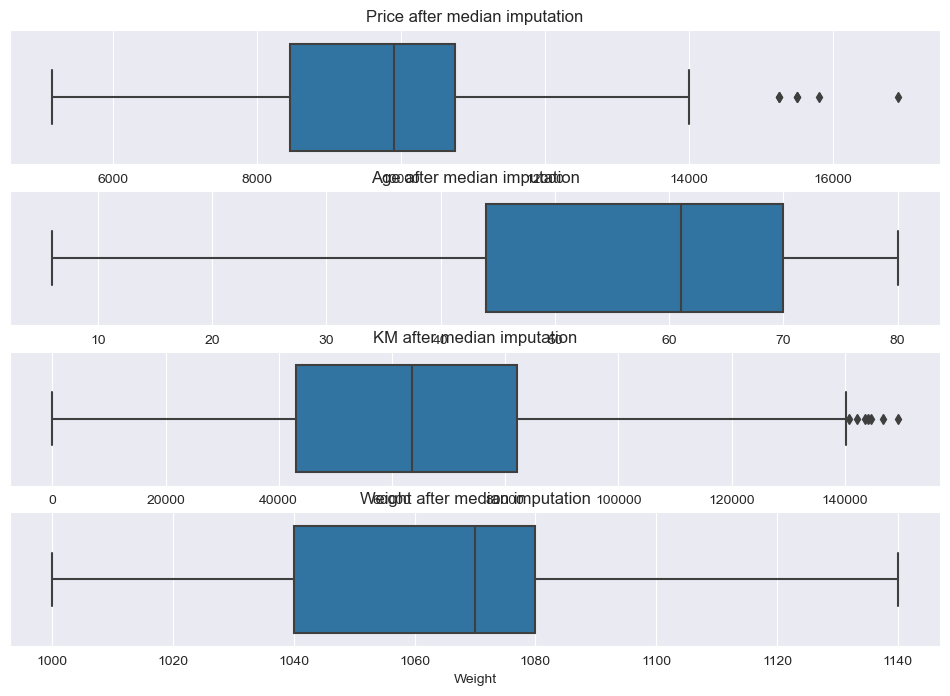

In [42]:
plt.figure(figsize=(12,8))
plt.subplot(411)
sns.boxplot(df2['Price'])
plt.title('Price after median imputation')

plt.subplot(412)
sns.boxplot(df2['Age'])
plt.title('Age after median imputation')

plt.subplot(413)
sns.boxplot(df2['KM'])
plt.title('KM after median imputation')

plt.subplot(414)
sns.boxplot(df2['Weight'])
plt.title('Weight after median imputation')

plt.show()


## Model after median imputation

In [43]:
model_after_median_imputation = smf.ols('Price ~ Age + KM + HP + CC + Doors + Gears + QT + Weight', data = df2).fit()

In [44]:
model_after_median_imputation.rsquared, model_after_median_imputation.rsquared_adj

(0.3725979714974693, 0.3690781845212979)

In [45]:
model_after_median_imputation.tvalues, model_after_median_imputation.pvalues

(Intercept     8.493100
 Age         -19.893149
 KM           -2.771775
 HP            1.870695
 CC           -0.640584
 Doors         5.060084
 Gears         1.719306
 QT            3.314872
 Weight       -4.815738
 dtype: float64,
 Intercept    4.983721e-17
 Age          6.548198e-78
 KM           5.647642e-03
 HP           6.159200e-02
 CC           5.218958e-01
 Doors        4.736101e-07
 Gears        8.577569e-02
 QT           9.398726e-04
 Weight       1.622784e-06
 dtype: float64)

## Lets try mean imputation to handle outliers

In [46]:
df3 = df1.copy()

In [47]:
for i in df1['Price']:
    q1 = np.quantile(df3.Price,0.25)
    q3 = np.quantile(df3.Price,0.75)
    mean = np.mean(df3.Price)
    iqr = q3 - q1
    upper_bound = q3 + (1.5*iqr)
    lower_bound = q1 - (1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df3['Price'] = df3['Price'].replace(i, mean)

In [48]:
for i in df1['Age']:
    q1 = np.quantile(df3.Age,0.25)
    q3 = np.quantile(df3.Age,0.75)
    mean = np.mean(df3.Age)
    iqr = q3 - q1
    upper_bound = q3 + (1.5*iqr)
    lower_bound = q1 - (1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df3['Age'] = df3['Age'].replace(i, mean)

In [49]:
for i in df1['KM']:
    q1 = np.quantile(df3.KM,0.25)
    q3 = np.quantile(df3.KM,0.75)
    mean = np.mean(df3.KM)
    iqr = q3 - q1
    upper_bound = q3 + (1.5*iqr)
    lower_bound = q1 - (1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df3['KM'] = df3['KM'].replace(i, mean)

In [50]:
for i in df1['Weight']:
    q1 = np.quantile(df3.Weight,0.25)
    q3 = np.quantile(df3.Weight,0.75)
    mean = np.mean(df3.Weight)
    iqr = q3 - q1
    upper_bound = q3 + (1.5*iqr)
    lower_bound = q1 - (1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df3['Weight'] = df3['Weight'].replace(i, mean)

In [51]:
for i in df1['QT']:
    q1 = np.quantile(df3.QT,0.25)
    q3 = np.quantile(df3.QT,0.75)
    mean = np.mean(df3.QT)
    iqr = q3 - q1
    upper_bound = q3 + (1.5*iqr)
    lower_bound = q1 - (1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df3['QT'] = df3['QT'].replace(i, mean)

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\LENOVO\anaconda3\li

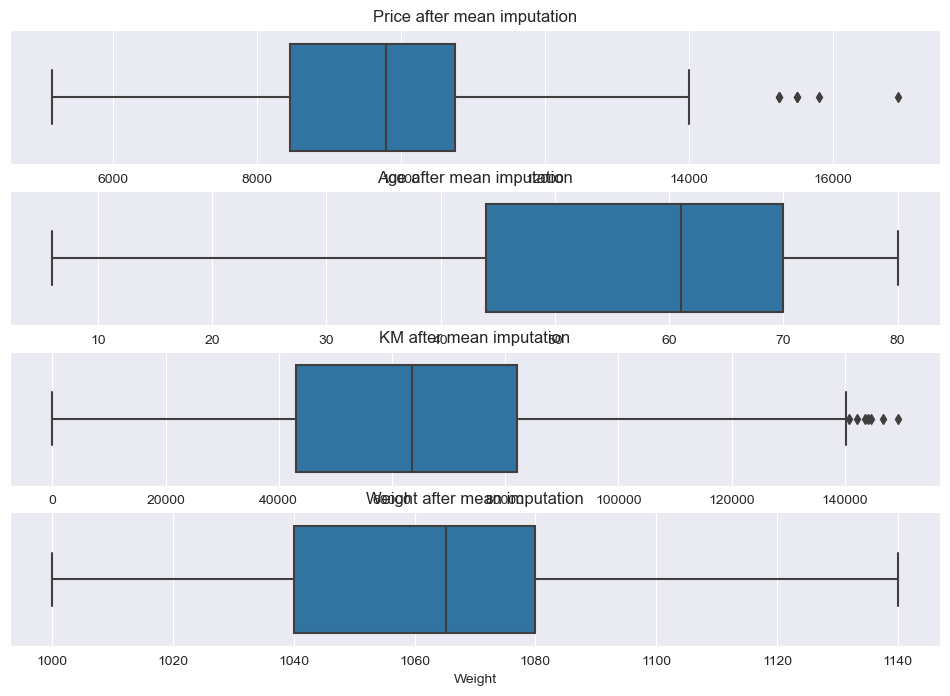

In [52]:
plt.figure(figsize=(12,8))
plt.subplot(411)
sns.boxplot(df3['Price'])
plt.title('Price after mean imputation')

plt.subplot(412)
sns.boxplot(df3['Age'])
plt.title('Age after mean imputation')

plt.subplot(413)
sns.boxplot(df3['KM'])
plt.title('KM after mean imputation')

plt.subplot(414)
sns.boxplot(df3['Weight'])
plt.title('Weight after mean imputation')

plt.show()

In [53]:
df3.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500.000000,23.0,46986.0,90,2000,3,5,87.020209,1072.287108
1,13750.000000,23.0,72937.0,90,2000,3,5,87.020209,1072.287108
2,13950.000000,24.0,41711.0,90,2000,3,5,87.020209,1072.287108
3,10238.651011,26.0,48000.0,90,2000,3,5,87.020209,1072.287108
4,13750.000000,30.0,38500.0,90,2000,3,5,87.020209,1071.770242


## Model after mean imputation

In [54]:
model_after_mean_imputation = smf.ols('Price ~ Age + KM + HP + CC + Doors + Gears + QT + Weight', data = df3).fit()

In [55]:
model_after_mean_imputation.rsquared, model_after_mean_imputation.rsquared_adj

(0.4223401115808424, 0.4190993828940588)

In [56]:
model_after_mean_imputation.tvalues, model_after_mean_imputation.pvalues

(Intercept     8.780417
 Age         -21.588155
 KM           -3.085350
 HP            2.348319
 CC           -0.730264
 Doors         4.441303
 Gears         1.585785
 QT            4.670845
 Weight       -5.095834
 dtype: float64,
 Intercept    4.571696e-18
 Age          1.155197e-89
 KM           2.072233e-03
 HP           1.899433e-02
 CC           4.653487e-01
 Doors        9.631565e-06
 Gears        1.130099e-01
 QT           3.282337e-06
 Weight       3.937113e-07
 dtype: float64)

### Observation : As we can see after Median or Mean Imputation the model is not performing well as the value of rsquared is getting worst.

# Model validation Technique

### Here we will try to check two assumption of linear regression model. 1) Collinearity of variable by Calculating VIF 2) Distibution of residuals.

In [57]:
# 1) Collinearity Problem Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables

rsq_age = smf.ols('Age ~ KM + HP + CC + Doors + Gears + QT + Weight',data= df1).fit().rsquared
vif_age = 1/(1-rsq_age)

rsq_km = smf.ols('KM ~ Age + HP + CC + Doors + Gears + QT + Weight',data= df1).fit().rsquared
vif_km = 1/(1-rsq_km)

rsq_hp = smf.ols('HP ~ Age + KM + CC + Doors + Gears + QT + Weight',data= df1).fit().rsquared
vif_hp = 1/(1-rsq_hp)

rsq_cc = smf.ols('CC ~ Age + KM + HP + Doors + Gears + QT + Weight',data= df1).fit().rsquared
vif_cc = 1/(1-rsq_cc)

rsq_doors = smf.ols('Doors ~ Age + KM + HP + CC + Gears + QT + Weight',data= df1).fit().rsquared
vif_doors = 1/(1-rsq_doors)

rsq_gears = smf.ols('Gears ~ Age + KM + HP + CC + Doors + QT + Weight',data= df1).fit().rsquared
vif_gears = 1/(1-rsq_gears)

rsq_qt = smf.ols('QT ~ Age + KM + HP + CC + Doors + Gears + Weight',data= df1).fit().rsquared
vif_qt = 1/(1-rsq_qt)

rsq_weight = smf.ols('Weight ~ Age + KM + HP + CC + Doors + Gears + QT',data= df1).fit().rsquared
vif_weight = 1/(1-rsq_weight)


# Putting the values in Dataframe format
d1={'Variables':['Age' , 'KM' , 'HP' , 'CC' , 'Doors' , 'Gears' , 'QT' , 'Weight'],'Vif':[vif_age, vif_km, vif_hp, vif_cc, vif_doors, vif_gears, vif_qt, vif_weight]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QT,2.295375
7,Weight,2.487180


### Observation : None of the variable has VIF > 5, No collinearity, so we can consider all variables in regression equation.

In [58]:
# 2) Residual Analysis
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)

residuals = np.round(model1.resid, 3)
residuals.head()

0   -3291.959
1   -2503.800
2   -2829.635
3   -1455.789
4   -2450.217
dtype: float64

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

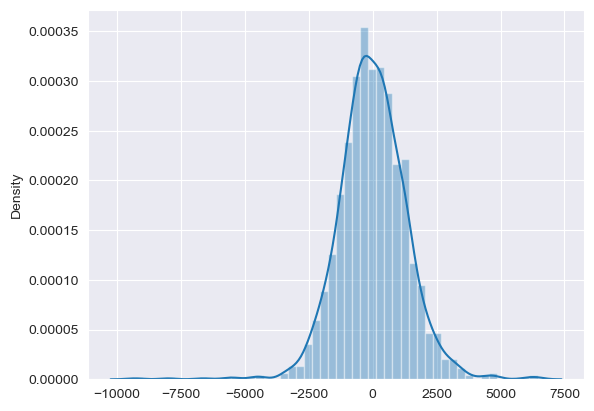

In [59]:
sns.distplot(residuals)

In [60]:
residuals.mean()

5.574912971395408e-06

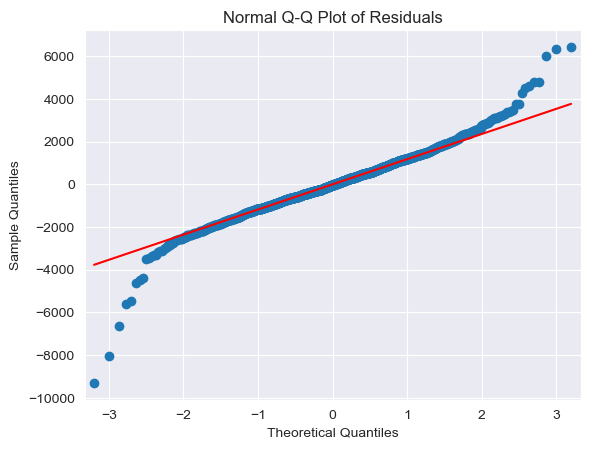

In [61]:
# Draw Q-Q Plot

import statsmodels.api as sm
qqplot = sm.qqplot(model1.resid, line = 'q')
plt.title('Normal Q-Q Plot of Residuals')
plt.show()

### Observation : The residuals are normally distributed with  mean equals to approximetly zero. Only one or two records are considered as a outliers.

{'whiskers': [<matplotlib.lines.Line2D at 0x1a2b8a54280>,
 'caps': [<matplotlib.lines.Line2D at 0x1a2b8a54850>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a2b8a39df0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a2b8a54df0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a2b8a65100>],
 'means': []}

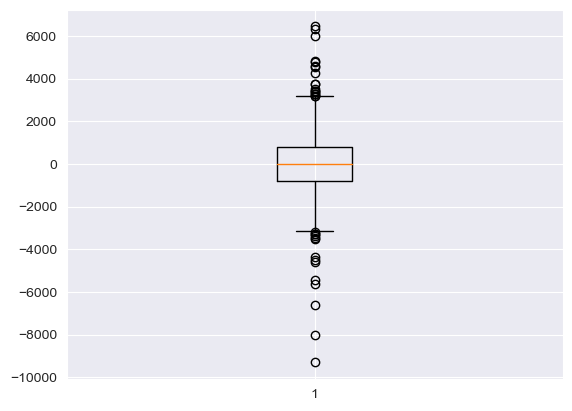

In [62]:
# boxpplot to explore is there any outlier in residual

plt.boxplot(model1.resid)

In [63]:
list(np.where(model1.resid < -4000))

[array([190, 191, 220, 392, 401, 600, 653, 959], dtype=int64)]

In [64]:
list(np.where(model1.resid > 4000))

[array([ 109,  110,  111,  124,  146,  170,  522, 1057], dtype=int64)]

In [65]:
predictions = model1.fittedvalues
predictions

0       16791.958871
1       16253.800414
2       16779.635210
3       16405.789389
4       16200.217277
            ...     
1430     8794.255037
1431     8292.577342
1432     8455.434402
1433     8579.222041
1434    10396.087526
Length: 1435, dtype: float64

In [66]:
pd.DataFrame({'Actual' : df1.Price,
             'Predicted' : predictions,
             'Error' : residuals})

,Actual,Predicted,Error
0,13500,16791.958871,-3291.959
1,13750,16253.800414,-2503.800
2,13950,16779.635210,-2829.635
3,14950,16405.789389,-1455.789
4,13750,16200.217277,-2450.217
...,...,...,...
1430,7500,8794.255037,-1294.255
1431,10845,8292.577342,2552.423
1432,8500,8455.434402,44.566
1433,7250,8579.222041,-1329.222


In [67]:
## Test for Homoscedasticity or Hetroscedasticity (plotting model's standardized fitted values vs standardized residual values)

def get_standardized_values(vals):
    return (vals - vals.mean())/vals.std() # uder defined z = (x - mu)/sigma

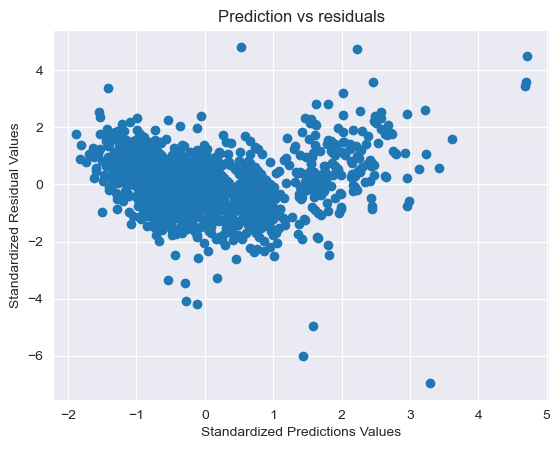

In [68]:
plt.scatter(get_standardized_values(predictions), 
            get_standardized_values(residuals))
plt.title('Prediction vs residuals')
plt.xlabel('Standardized Predictions Values')
plt.ylabel('Standardized Residual Values')
plt.show()

### Observation : We can see there is constant variance (Homoscedasticity) in Error.

#  Model Deletion Diagnostics (Checking Outliers or Influencers)

### Two Techniques : 1. Cooks Distance & 2. Leverage Value

In [69]:
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance
(c,_)= model1.get_influence().cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110550e-07, 6.99854767e-04, 1.08408002e-02])

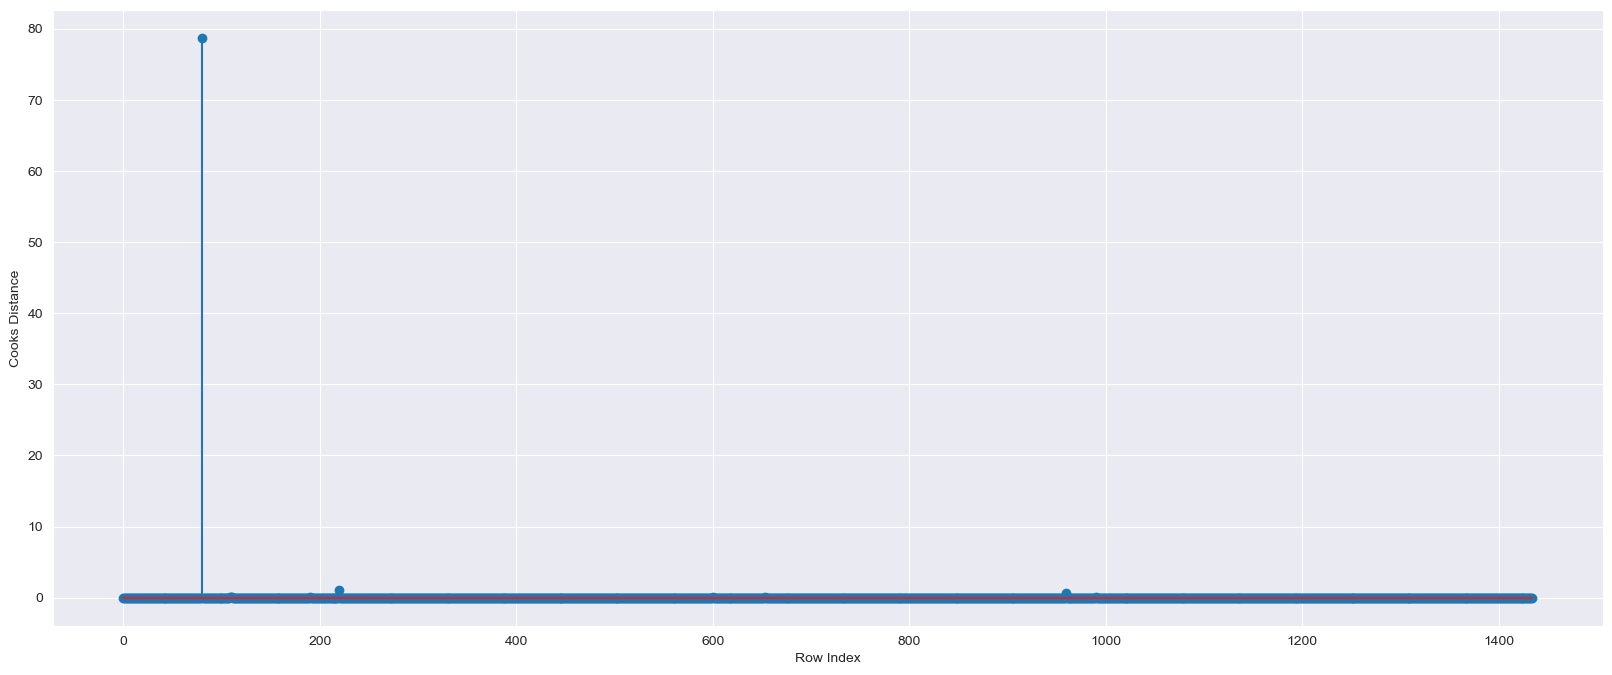

In [70]:
# Plot the influencers using the Stem Plot
fig = plt.figure(figsize=(20,8))
plt.stem(np.arange(len(df1)), np.round(c , 5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [71]:
# Index and Value of influencer where c> 0.5
np.argmax(c) , np.max(c)

(80, 78.72950582248232)

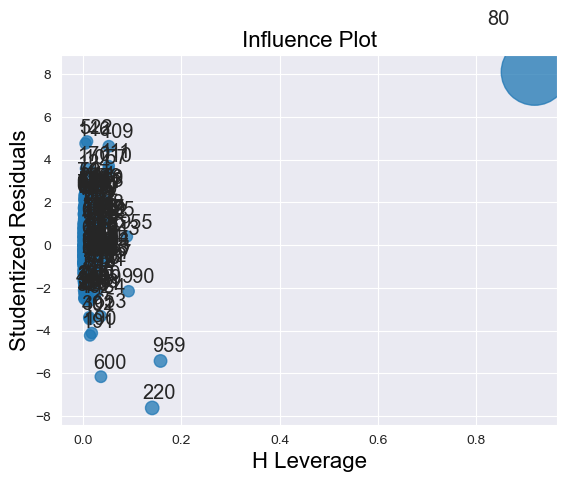

In [72]:
# 2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
influence_plot(model1)
plt.show()

In [73]:
# Leverage Cut-off value =  3*(k+1)/n
k = df1.shape[1]
n = df1.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.020905923344947737

In [74]:
df1[df1.index.isin([80])]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
80,18950,25,20019,110,16000,5,5,100,1180


### Let's improve the model by deleting the influence point and creating a new dataframe

In [75]:
df4= df1.copy()
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
df4 = df4.drop(df4.index[[80]],axis=0).reset_index(drop=True)
df4

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


### Model Deletion diagnostics and Final Model

In [76]:
while model1.rsquared < 0.90:
    for c in [np.max(c)>leverage_cutoff]:
        model1 = smf.ols('Price ~ Age+KM+HP+CC+Doors+Gears+QT+Weight',data=df4).fit()
        (c,_) = model1.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        df4 = df4.drop(df4.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        df4
    else:
        final_model = smf.ols('Price ~ Age+KM+HP+CC+Doors+Gears+QT+Weight',data=df4).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to", final_model.rsquared)

Thus model accuracy is improved to 0.8765926307402282
Thus model accuracy is improved to 0.8839684606741538
Thus model accuracy is improved to 0.8882395145171204
Thus model accuracy is improved to 0.8902571486612915
Thus model accuracy is improved to 0.8909888960319987
Thus model accuracy is improved to 0.8922595280462808
Thus model accuracy is improved to 0.8933621011392295
Thus model accuracy is improved to 0.8947147371605556
Thus model accuracy is improved to 0.8955233405057648
Thus model accuracy is improved to 0.8930210061069088
Thus model accuracy is improved to 0.8939546425147169
Thus model accuracy is improved to 0.8954112430715817
Thus model accuracy is improved to 0.8960182592139027
Thus model accuracy is improved to 0.8968403506948497
Thus model accuracy is improved to 0.8964026771830705
Thus model accuracy is improved to 0.8958538146890626
Thus model accuracy is improved to 0.8953750500147551
Thus model accuracy is improved to 0.8949455651565241
Thus model accuracy is impro

In [77]:
influence_point = final_model.get_influence()
c, p_value = influence_point.cooks_distance

In [78]:
df4.shape

(1330, 9)

In [79]:
df4.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13750,23,72937,90,2000,3,5,210,1165
1,14950,26,48000,90,2000,3,5,210,1165
2,13750,30,38500,90,2000,3,5,210,1170
3,12950,32,61000,90,2000,3,5,210,1170
4,16900,27,94612,90,2000,3,5,210,1245


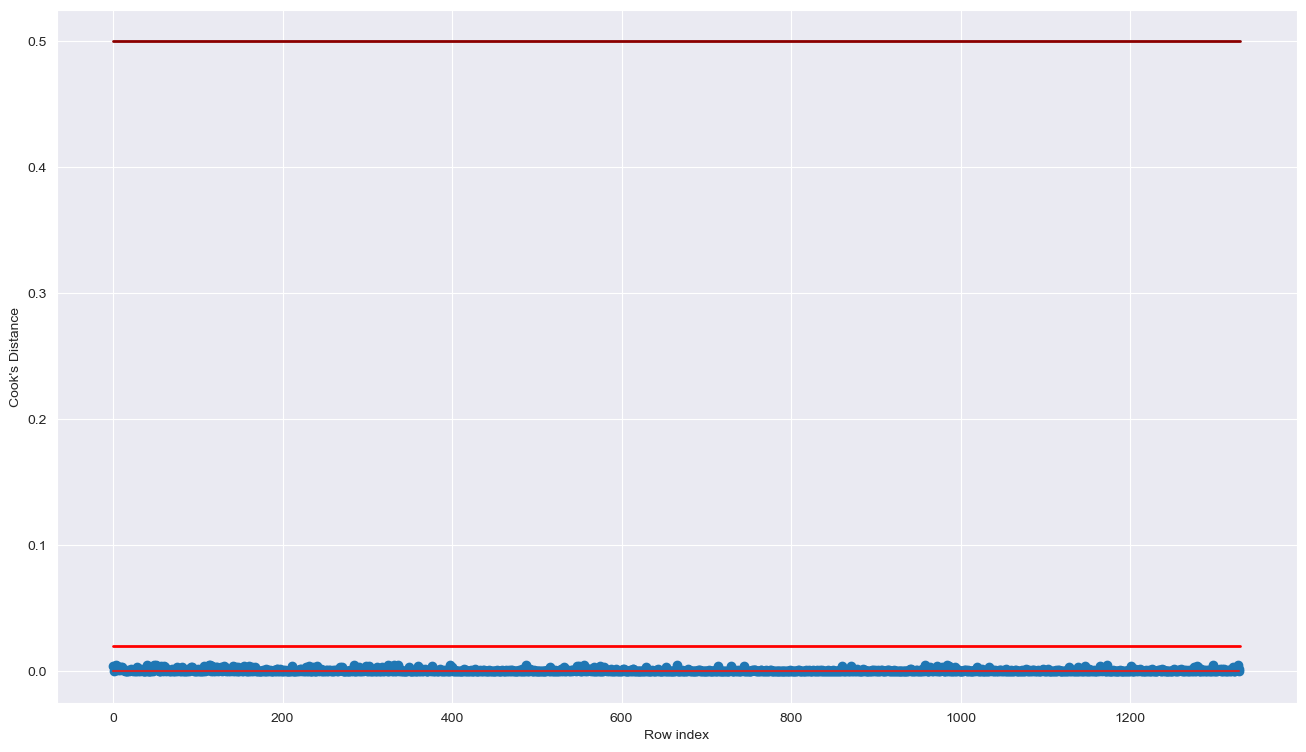

In [81]:
fig = plt.figure(figsize = (16,9))
x = [0,1330]
y = [0.5,0.5]
plt.plot(x, y,color='darkred', linewidth=2)
y1 = [0.02,0.02]
plt.plot(x , y1, color = 'red', linewidth = 2)
plt.stem(np.arange(len(df4)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel("Cook's Distance")
plt.show()

### Observation :  All the points are below our leverage cut off line. hence, we can say that there are no influencers present in model and we can proceed with predictions.

In [82]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     1492.
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        17:47:50   Log-Likelihood:                -11038.
No. Observations:                1330   AIC:                         2.209e+04
Df Residuals:                    1321   BIC:                         2.214e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.864e+04   1513.105    -12.316      0.000   -2.16e+04   -1.57e+04
Age         -108.2573      2.181    -49.648      0.000    -112.535    -103.980
KM            -0.0155      0.001    -14.830      0.000      -0.018      -0.013
HP             7.8533      3.037      2.586      0.010       1.895      13.812
CC            -2.2731      0.291     -7.799      0.000      -2.845      -1.701
Doors       -149.1873     32.432     -4.600      0.000    -212.811     -85.563
Gears        251.4363    163.559      1.537      0.124     -69.428     572.301
QT           -11.6187      1.626     -7.144      0.000     -14.809      -8.428
Weight        36.9768      1.446     25.566      0.000      34.139      39.814
==============================================================================
Omnibus:                        5.509   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.064   Jarque-Bera (JB):                5.515
Skew:                           0.158   Prob(JB):                       0.0635
Kurtosis:                       2.993   Cond. No.                     4.34e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.34e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [83]:
np.sqrt(final_model.mse_resid)

975.92713992628

# Feature Engineering

### Applying some Data Transformation to increase the linear realtionship and improve our model prediction as well it scores

### Log Transformation

In [84]:
df_log_scaled = pd.DataFrame()
df_log_scaled['Age'] = np.log(df4.Age)
df_log_scaled['Price'] = np.log(df4.Price)
df_log_scaled['KM'] = np.log(df4.KM)
df_log_scaled['Weight'] = np.log(df4.Weight)
df_log_scaled['CC'] = df4['CC']
df_log_scaled['Doors'] = df4['Doors']
df_log_scaled['HP'] = df4['HP']
df_log_scaled['QT'] = df4['QT']
df_log_scaled.head()

,Age,Price,KM,Weight,CC,Doors,HP,QT
0,3.135494,9.528794,11.197351,7.060476,2000,3,90,210
1,3.258097,9.612467,10.778956,7.060476,2000,3,90,210
2,3.401197,9.528794,10.558414,7.064759,2000,3,90,210
3,3.465736,9.468851,11.018629,7.064759,2000,3,90,210
4,3.295837,9.735069,11.457540,7.126891,2000,3,90,210


In [85]:
log_transformed_model = smf.ols("Price ~ Age+KM+HP+CC+Doors+QT+Weight", data = df_log_scaled).fit()
# Finding rsquared values for Log transformation
log_transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     625.0
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        18:35:33   Log-Likelihood:                 843.15
No. Observations:                1330   AIC:                            -1670.
Df Residuals:                    1322   BIC:                            -1629.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.7694      1.527     -3.777      0.000      -8.766      -2.773
Age           -0.4075      0.013    -30.502      0.000      -0.434      -0.381
KM             0.0038      0.006      0.654      0.513      -0.008       0.015
HP             0.0031      0.000      7.927      0.000       0.002       0.004
CC            -0.0003   3.78e-05     -7.250      0.000      -0.000      -0.000
Doors         -0.0041      0.004     -0.968      0.333      -0.012       0.004
QT            -0.0001      0.000     -0.524      0.600      -0.001       0.000
Weight         2.3966      0.223     10.765      0.000       1.960       2.833
==============================================================================
Omnibus:                      284.877   Durbin-Watson:                   1.175
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1144.931
Skew:                          -0.976   Prob(JB):                    2.41e-249
Kurtosis:                       7.105   Cond. No.                     6.86e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.86e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Cube-Root Transformation

In [86]:
df_cbrt_scaled = pd.DataFrame()
df_cbrt_scaled['Age'] = np.cbrt(df4.Age)
df_cbrt_scaled['Price'] = np.cbrt(df4.Price)
df_cbrt_scaled['KM'] = np.cbrt(df4.KM)
df_cbrt_scaled['Weight'] = np.cbrt(df4.Weight)
df_cbrt_scaled['CC'] = df4['CC']
df_cbrt_scaled['QT'] = df4['QT']
df_cbrt_scaled['Doors'] = df4['Doors']
df_cbrt_scaled['Gears'] = df4['Gears']
df_cbrt_scaled['HP'] = df4['HP']
df_cbrt_scaled.head()

,Age,Price,KM,Weight,CC,QT,Doors,Gears,HP
0,2.843867,23.957099,41.781366,10.522251,2000,210,3,5,90
1,2.962496,24.634688,36.342412,10.522251,2000,210,3,5,90
2,3.107233,23.957099,33.766567,10.537282,2000,210,3,5,90
3,3.174802,23.483163,39.364972,10.537282,2000,210,3,5,90
4,3.000000,25.662299,45.566822,10.757791,2000,210,3,5,90


In [87]:
cbrt_transformed_model = smf.ols('Price ~ Age+KM+HP+CC+Doors+Gears+QT+Weight', data= df_cbrt_scaled).fit()
cbrt_transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     991.6
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        18:49:04   Log-Likelihood:                -1505.8
No. Observations:                1330   AIC:                             3030.
Df Residuals:                    1321   BIC:                             3076.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -18.5991      3.723     -4.996      0.000     -25.902     -11.296
Age           -2.5835      0.069    -37.297      0.000      -2.719      -2.448
KM            -0.0450      0.004    -11.317      0.000      -0.053      -0.037
HP             0.0139      0.002      6.029      0.000       0.009       0.018
CC            -0.0013      0.000     -5.690      0.000      -0.002      -0.001
Doors         -0.0179      0.025     -0.707      0.480      -0.067       0.032
Gears          0.2967      0.126      2.350      0.019       0.049       0.544
QT            -0.0016      0.001     -1.232      0.218      -0.004       0.001
Weight         5.0086      0.375     13.353      0.000       4.273       5.744
==============================================================================
Omnibus:                       83.976   Durbin-Watson:                   1.547
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.525
Skew:                          -0.447   Prob(JB):                     2.79e-34
Kurtosis:                       4.410   Cond. No.                     2.84e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.84e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Square-Root Transformation

In [88]:
df_sqrt_scaled = pd.DataFrame()
df_sqrt_scaled['Age'] = np.sqrt(df4.Age)
df_sqrt_scaled['Price'] = np.sqrt(df4.Price)
df_sqrt_scaled['KM'] = np.sqrt(df4.KM)
df_sqrt_scaled['Weight'] = np.sqrt(df4.Weight)
df_sqrt_scaled['CC'] = df4['CC']
df_sqrt_scaled['QT'] = df4['QT']
df_sqrt_scaled['Doors'] = df4['Doors']
df_sqrt_scaled['Gears'] = df4['Gears']
df_sqrt_scaled['HP'] = df4['HP']
df_sqrt_scaled.head()

,Age,Price,KM,Weight,CC,QT,Doors,Gears,HP
0,4.795832,117.260394,270.068510,34.132096,2000,210,3,5,90
1,5.099020,122.270193,219.089023,34.132096,2000,210,3,5,90
2,5.477226,117.260394,196.214169,34.205263,2000,210,3,5,90
3,5.656854,113.798067,246.981781,34.205263,2000,210,3,5,90
4,5.196152,130.000000,307.590637,35.284558,2000,210,3,5,90


In [89]:
sqrt_transformed_model = smf.ols('Price ~ Age+KM+HP+CC+Doors+Gears+QT+Weight',data= df_sqrt_scaled).fit()
sqrt_transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     1229.
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        18:55:05   Log-Likelihood:                -3993.0
No. Observations:                1330   AIC:                             8004.
Df Residuals:                    1321   BIC:                             8051.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -100.7308     15.607     -6.454      0.000    -131.348     -70.114
Age           -6.7197      0.157    -42.795      0.000      -7.028      -6.412
KM            -0.0384      0.003    -13.802      0.000      -0.044      -0.033
HP             0.0766      0.015      5.084      0.000       0.047       0.106
CC            -0.0082      0.001     -5.622      0.000      -0.011      -0.005
Doors         -0.2049      0.164     -1.251      0.211      -0.526       0.116
Gears          2.0321      0.819      2.481      0.013       0.425       3.639
QT            -0.0209      0.008     -2.563      0.010      -0.037      -0.005
Weight         7.9388      0.500     15.875      0.000       6.958       8.920
==============================================================================
Omnibus:                        7.852   Durbin-Watson:                   1.731
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                8.528
Skew:                          -0.128   Prob(JB):                       0.0141
Kurtosis:                       3.297   Cond. No.                     1.85e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Lets Try Robust Transformation

#### The  Robust Scaler, as the name suggest is not sensitive to outliers.
#### The scaler removes the median from the data
#### Scales the data by the IQR
#### Thus, the fromula would be: x_scaled = (x-q1)/(q3-q1)

In [90]:
df_robust_scaled = df4.copy()
columns= ['Price','Age','KM','Weight']
features = df_robust_scaled[columns]

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

df_robust_scaled[columns] = scaler.fit_transform(features.values)
df_robust_scaled.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,1.175000,-1.583333,0.211503,90,2000,3,5,210,2.222222
1,1.538636,-1.458333,-0.375961,90,2000,3,5,210,2.222222
2,1.175000,-1.291667,-0.599762,90,2000,3,5,210,2.333333
3,0.932576,-1.208333,-0.069708,90,2000,3,5,210,2.333333
4,2.129545,-1.416667,0.722122,90,2000,3,5,210,4.000000


In [91]:
robust_transformed_model = smf.ols("Price ~ Age+KM+HP+CC+Doors+Gears+QT+Weight", data = df_robust_scaled).fit()
# Finding rsquared values for robust transformation
robust_transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     1492.
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        19:22:13   Log-Likelihood:                -262.35
No. Observations:                1330   AIC:                             542.7
Df Residuals:                    1321   BIC:                             589.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9936      0.285      3.487      0.001       0.435       1.553
Age           -0.7873      0.016    -49.648      0.000      -0.818      -0.756
KM            -0.1989      0.013    -14.830      0.000      -0.225      -0.173
HP             0.0024      0.001      2.586      0.010       0.001       0.004
CC            -0.0007   8.83e-05     -7.799      0.000      -0.001      -0.001
Doors         -0.0452      0.010     -4.600      0.000      -0.064      -0.026
Gears          0.0762      0.050      1.537      0.124      -0.021       0.173
QT            -0.0035      0.000     -7.144      0.000      -0.004      -0.003
Weight         0.5042      0.020     25.566      0.000       0.466       0.543
==============================================================================
Omnibus:                        5.509   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.064   Jarque-Bera (JB):                5.515
Skew:                           0.158   Prob(JB):                       0.0635
Kurtosis:                       2.993   Cond. No.                     5.58e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Applying Standard Scaler
#### For each feature, the Standard Scaler scales the values such that the mean is 0 and the standard deviation is 1(or the variance).
#### x_scaled = x – mean/std_dev
#### However, Standard Scaler assumes that the distribution of the variable is normal. Thus, in case, the variables are not normally distributed, we either choose a different scaler or first, convert the variables to a normal distribution and then apply this scaler

In [92]:
from sklearn.preprocessing import StandardScaler

col_names = df4.columns
features = df4[col_names]

scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
df_standard_scaled = pd.DataFrame(features, columns = col_names)
df_standard_scaled.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,1.057454,-1.915503,0.136289,-0.883769,2.526466,-1.067888,-0.137393,3.424789,2.456469
1,1.446875,-1.746462,-0.576515,-0.883769,2.526466,-1.067888,-0.137393,3.424789,2.456469
2,1.057454,-1.521074,-0.848065,-0.883769,2.526466,-1.067888,-0.137393,3.424789,2.580538
3,0.797839,-1.408380,-0.204921,-0.883769,2.526466,-1.067888,-0.137393,3.424789,2.580538
4,2.079684,-1.690115,0.755851,-0.883769,2.526466,-1.067888,-0.137393,3.424789,4.441570


In [93]:
standard_scaler_transformed_model = smf.ols("Price ~ Age+KM+HP+CC+Doors+Gears+QT+Weight", data = df_standard_scaled).fit()
# Finding rsquared values for standard scaler transformation
standard_scaler_transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     1492.
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        19:26:17   Log-Likelihood:                -353.46
No. Observations:                1330   AIC:                             724.9
Df Residuals:                    1321   BIC:                             771.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.973e-16      0.009  -2.27e-14      1.000      -0.017       0.017
Age           -0.6235      0.013    -49.648      0.000      -0.648      -0.599
KM            -0.1756      0.012    -14.830      0.000      -0.199      -0.152
HP             0.0325      0.013      2.586      0.010       0.008       0.057
CC            -0.1307      0.017     -7.799      0.000      -0.164      -0.098
Doors         -0.0462      0.010     -4.600      0.000      -0.066      -0.026
Gears          0.0138      0.009      1.537      0.124      -0.004       0.032
QT            -0.1368      0.019     -7.144      0.000      -0.174      -0.099
Weight         0.4836      0.019     25.566      0.000       0.446       0.521
==============================================================================
Omnibus:                        5.509   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.064   Jarque-Bera (JB):                5.515
Skew:                           0.158   Prob(JB):                       0.0635
Kurtosis:                       2.993   Cond. No.                         4.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model Selection:

### We will analyze Mean Squared Error (MSE) or Root Mean Squared Error (RMSE) — AKA the average distance (squared to get rid of negative numbers) between the model’s predicted target value and the actual target value.
### Comparing different models with respect to the Root Mean Squared Errors

In [96]:
from sklearn.metrics import mean_squared_error

In [100]:
model1_pred = model1.predict(df1[['Age','KM','HP','CC','Doors','Gears','QT','Weight']])
model2_pred = model2.predict(df1[['Age','KM','HP','CC','Doors','Gears','QT','Weight']])
model3_pred = final_model.predict(df4[['Age','KM','HP','CC','Doors','Gears','QT','Weight']])
model4_pred = np.exp(log_transformed_model.predict(df_log_scaled[['Age','KM','HP','CC','Doors','QT','Weight']]))
model5_pred = pow(cbrt_transformed_model.predict(df_cbrt_scaled[['Age','KM','HP','CC','Doors','Gears','QT','Weight']]), 3)
model6_pred = np.square(sqrt_transformed_model.predict(df_sqrt_scaled[['Age','KM','HP','CC','Doors','Gears','QT','Weight']]))
model7_pred = robust_transformed_model.predict(df_robust_scaled[['Age','KM','HP','CC','Doors','Gears','QT','Weight']])
model8_pred = standard_scaler_transformed_model.predict(df_standard_scaled[['Age','KM','HP','CC','Doors','Gears','QT','Weight']])

In [105]:
model1_rmse = np.sqrt(mean_squared_error(df1['Price'], model1_pred))
model2_rmse = np.sqrt(mean_squared_error(df1['Price'], model2_pred))
model3_rmse = np.sqrt(mean_squared_error(df4['Price'], model3_pred))
model4_rmse = np.sqrt(mean_squared_error(df4['Price'], model4_pred))
model5_rmse = np.sqrt(mean_squared_error(df4['Price'], model5_pred))
model6_rmse = np.sqrt(mean_squared_error(df4['Price'], model6_pred))
model7_rmse = np.sqrt(mean_squared_error(df4['Price'], model7_pred))
model8_rmse = np.sqrt(mean_squared_error(df4['Price'], model8_pred))

In [106]:
models = {'Different Models': ['model1', 'model2', 'final_model', 'log_transformed_model', 'cbrt_transformed_model', 'sqrt_transformed_model', 'robust_transformed_model', 'standard_scalar_transformed_model'], 
          'R-Squared_adjusted':[model1.rsquared_adj, model2.rsquared_adj, final_model.rsquared_adj, log_transformed_model.rsquared_adj, cbrt_transformed_model.rsquared_adj, sqrt_transformed_model.rsquared_adj, robust_transformed_model.rsquared_adj, standard_scaler_transformed_model.rsquared_adj],
          'RSME' : [model1_rmse, model2_rmse, model3_rmse, model4_rmse, model5_rmse, model6_rmse, model7_rmse, model8_rmse]}
model_table = pd.DataFrame(models)
model_table

,Different Models,R-Squared_adjusted,RSME
0,model1,0.899620,1714.040433
1,model2,0.861775,1338.402785
2,final_model,0.899773,972.619526
3,log_transformed_model,0.766727,1794.575325
4,cbrt_transformed_model,0.856384,1152.557795
5,sqrt_transformed_model,0.880837,1010.897945
6,robust_transformed_model,0.899773,10934.224536
7,standard_scalar_transformed_model,0.899773,10934.387706


# As final_model has the minimum RMSE and highest Adjusted R-squared score. Hence, we are going to use final_model to predict our values.
